In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Pretty-plot style
sns.set(style="whitegrid")

In [17]:
#Loading the data
df = pd.read_csv("us-counties-covid19-2020-50k.csv")

#Previewing the first few rows
df.head()

,date,county,state,fips,cases,deaths
0,2020-07-07,Fond du Lac,Wisconsin,55039.0,339,6.0
1,2020-06-26,Bucks,Pennsylvania,42017.0,5676,561.0
2,2020-05-09,Pickens,South Carolina,45077.0,68,1.0
3,2020-05-15,Phelps,Nebraska,31137.0,13,0.0
4,2020-11-04,Mackinac,Michigan,26097.0,182,0.0


In [25]:
#Cleaning the data
#Converting date to datetime
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')

#Dropping rows where date couldn't be parsed
df = df.dropna(subset=['date'])

#Removing duplicates
df=df.drop_duplicates()

#View missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 date         0
county       0
state        0
fips       420
cases        0
deaths    1106
dtype: int64


In [27]:
#Aggregating the data by state

# Total cases and deaths per state
summary = df.groupby('state').agg(
    total_cases=pd.NamedAgg(column='cases', aggfunc='sum'),
    total_deaths=pd.NamedAgg(column='deaths', aggfunc='sum')
).reset_index()

# Sorting by most affected states
summary = summary.sort_values(by='total_cases', ascending=False)

# Previewing the data
summary.head()


,state,total_cases,total_deaths
46,Texas,10317999,177326.0
33,New York,8919753,638549.0
4,California,8482919,144447.0
9,Florida,6799288,130514.0
2,Arizona,3702313,77870.0


In [31]:
#Saving the full cleaned data
df.to_csv("covid-2020-cleaned.csv", index = False)

#Saving summarized state-wise data
summary.to_csv("covid_summary_by_state.csv", index = False)

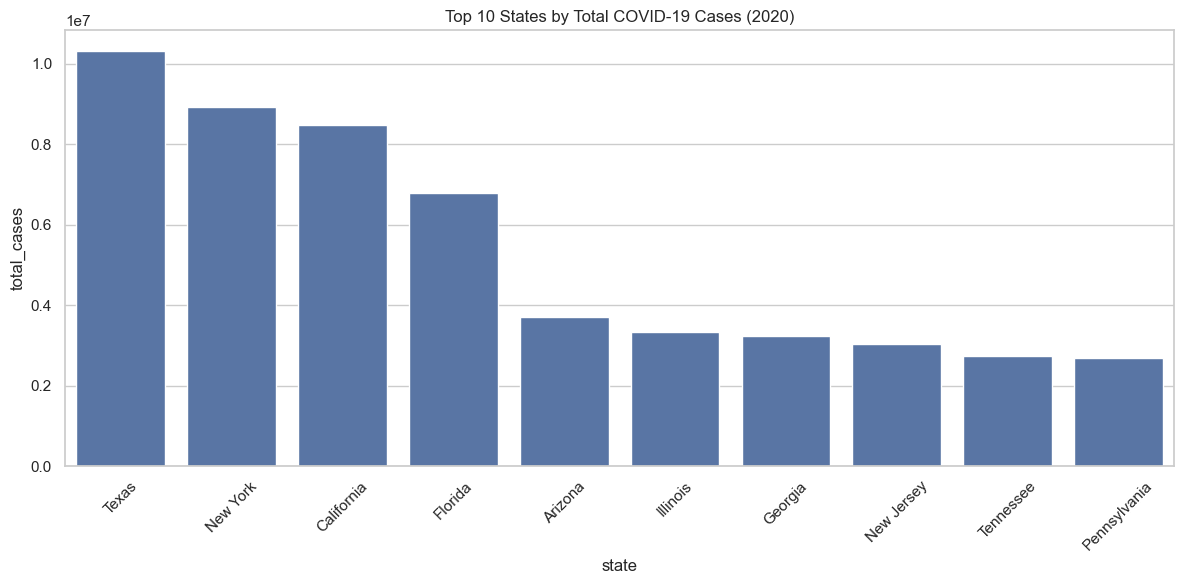

In [33]:
# Plotting top 10 states by total cases
plt.figure(figsize=(12, 6))
sns.barplot(data=summary.head(10), x='state', y='total_cases')
plt.title("Top 10 States by Total COVID-19 Cases (2020)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
